### 0: Importing libraries and datasets

In [14]:
### Libraries
import numpy as np
import pandas as pd
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Datasets
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
# print("shape: of matrix: ", train_data.shape, "\n", train_data.head())
# print(train_data.isna().sum()) #Check if we have any missing values

### 1: Hypothesis Generation

We need to come up with some shit here

### 2: Visualizing The Data

Feel free to add more graphs

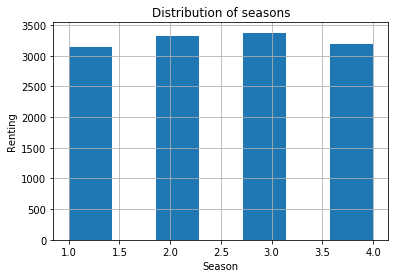

In [3]:
## Seasons
plt.title('Distribution of seasons')
plt.xlabel('Season')
plt.ylabel('Renting')
train_data['season'].hist(bins=7) #I put 8 bins to have a nice spacing between each season
plt.show()
## Seems like 2 and 3 (summer and fall) are the most popular seasons

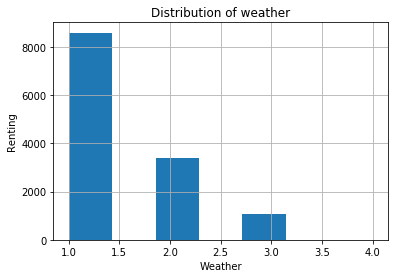

In [4]:
## Weather
plt.title('Distribution of weather')
plt.xlabel('Weather')
plt.ylabel('Renting')
train_data['weathersit'].hist(bins=7) #I put 8 bins to have a nice spacing between each season
plt.show()
## Seems like Clear weather is by far superior

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


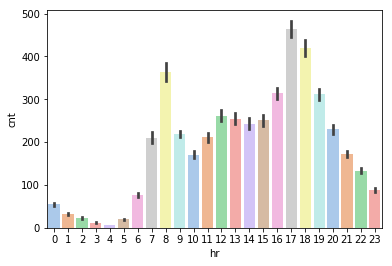

In [5]:
## Hourly
x = train_data['hr']
y = train_data['cnt']
sns.barplot(x=x, y=y, palette='pastel')
plt.show()
## Around 8h00 and 17h00 - 18h00 it's peak moment

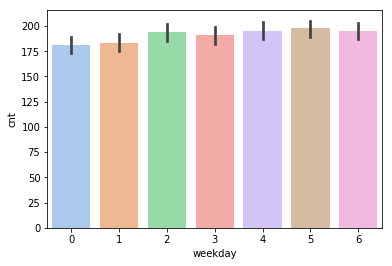

In [6]:
## Daily
x = train_data['weekday']
y = train_data['cnt']
sns.barplot(x=x, y=y, palette='pastel')
plt.show()
## Amount of bikes rented is pretty consistent per day

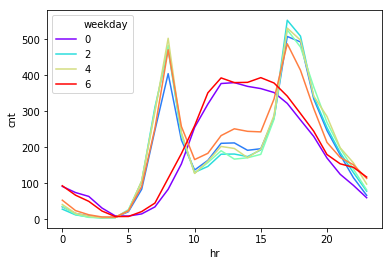

In [7]:
## Rentals Per hour Per day
daily_rentals = pd.DataFrame(train_data.groupby(['hr', 'weekday'], sort = True)['cnt'].mean()).reset_index()
x = daily_rentals['hr']
y = daily_rentals['cnt']
h = daily_rentals['weekday']
sns_plt = sns.lineplot(x=x, y=y, hue = h, data = daily_rentals, palette='rainbow')
## 0 and 6 are Sunday and Saturday respectively. This plot shows the difference in rental behavior during workdays and weekends
plt.show()

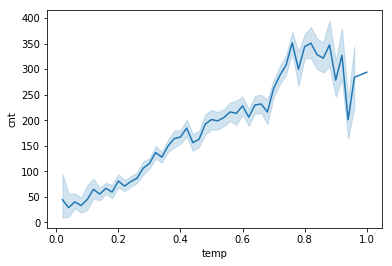

In [8]:
## Rentals with respect to temperature
## Temperature is normalized between 0 and 1
x = train_data['temp']
y = train_data['cnt']
sns.lineplot(x=x, y=y, data=train_data)
plt.show()
## Shows that around temp=0.68 there is a huge increase in rentals

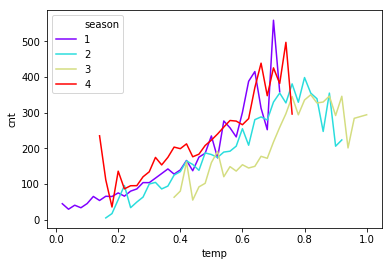

In [9]:
## Plot of amount of rentals with respect to the temperature PER season
daily_rentals = pd.DataFrame(train_data.groupby(['temp', 'season'], sort = True)['cnt'].mean()).reset_index()
x = daily_rentals['temp']
y = daily_rentals['cnt']
h = daily_rentals['season']
sns_plt = sns.lineplot(x=x, y=y, hue = h, data = daily_rentals, palette='rainbow')
plt.show()
## Not sure if this one is useful

### 3: Hypothesis Testing

Well first we'd need some Hypothesis

### 4: Model Building 

This is where the magic happens

**Linear Regression**

In [10]:
### Linear Regression
output_data = train_data.loc[:, 'cnt']
input_data = train_data.drop(['cnt'], axis=1)
print("y data: ", output_data.shape)
print("x data: ", input_data.shape)

lin_reg = LinearRegression().fit(input_data, output_data)
prediction = lin_reg.predict(test_data)
print("prediction", prediction.shape)

y data:  (13035,)
x data:  (13035, 11)
prediction (4344,)


In [11]:
### Setting up the output doc
id_column = [x for x in range(1, 4345)]
cnt_column = ['cnt']
prediction_df = pd.DataFrame(index=id_column, columns=cnt_column)
prediction_df.columns.name = 'Id'
prediction_df['cnt'] = [int(pred) for pred in prediction]

# to make sure each value is 0 or higher
prediction_df = prediction_df.clip(lower = 0)

print("prediction df")
print(prediction_df.head())

prediction df
Id  cnt
1    69
2    77
3   187
4   133
5   258


**Random Decision Forest**

In [16]:
### Random Decision Forest
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10, max_features='auto',
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1, oob_score=False,
random_state=None, verbose=0, warm_start=False)

# Fit the model on X_train and y_train
forest_reg.fit(input_data, output_data)
# Predict on X_test and register the log of the prediction
forest_pred = forest_reg.predict(test_data)

print("random forest: ", forest_pred.shape)

random forest:  (4344,)


In [18]:
### Setting up the output doc
id_column = [x for x in range(1, 4345)]
cnt_column = ['cnt']
forest_df = pd.DataFrame(index=id_column, columns=cnt_column)
forest_df.columns.name = 'Id'
forest_df['cnt'] = [int(pred) for pred in forest_pred]

# to make sure each value is 0 or higher
forest_df = forest_df.clip(lower = 0)

print("random forest df")
print(forest_df.head())

random forest df
Id  cnt
1     5
2   182
3   181
4    37
5   104
